In [1]:
import pandas as pd
from googleapiclient.discovery import build

In [ ]:
import os
load_dotenv()

In [4]:
api_key = os.environ.get("API_KEY")
video_id = 'YxQQnn22RXI'
 
comments = list()
api_obj = build('youtube', 'v3', developerKey=api_key)
response = api_obj.commentThreads().list(part='snippet,replies', videoId=video_id, maxResults=100).execute()

In [5]:
while response:
    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([comment['textDisplay'], comment['authorDisplayName'], comment['publishedAt'], comment['likeCount']])
 
        # if item['snippet']['totalReplyCount'] > 0:
        #     for reply_item in item['replies']['comments']:
        #         reply = reply_item['snippet']
        #         comments.append([reply['textDisplay'], reply['authorDisplayName'], reply['publishedAt'], reply['likeCount']])
 
    if 'nextPageToken' in response:
        response = api_obj.commentThreads().list(part='snippet,replies', videoId=video_id, pageToken=response['nextPageToken'], maxResults=100).execute()
    else:        
        break

In [6]:
df = pd.DataFrame(comments, columns=['comment', 'user_name', 'publish_date', 'likes'])
df

comment  user_name  \
0                              Ìä∏ÏàòÎì§ÏóêÍ≤å Ï≤òÏùåÏúºÎ°ú ÎèôÏ†ïÏã¨ÏùÑ ÎäêÎÇÄÎÇò...        ÎààÏã∏Îûå   
1            ÎßåÏïΩ ÎÇòÏ§ëÏóêÎèÑ Í∞ÄÎ©¥ the cliff? ÎßûÎÇò Í±∞Í∏∞ Í∞ÄÎ≥¥ÏÑ∏Ïöî ÏôÑÏ†Ñ Î∞úÎ¶¨Ïò®ÎìØ         ÏïäÏïä   
2                          Ïñ∏Îãà ÎÇò 7Ïõî 2ÏùºÏóê ÏÉùÏùºÏù¥Íµ¨ Ï†úÏ£ºÎèÑ ÏÇ¥ÏïÑ„Öè„Öè„Öè        Ïû•ÎÇòÏùÄ   
3                                                  „Öã„Öã       Ïù∏ÏÉùÏûºÏûº   
4                            Î™®ÎãàÌÑ∞ ÌïòÎ©¥ Î©ÄÎ¶¨ Í±∞Î¶¨ÎëêÍ∏∞ ÌñàÎã§ „Öé„Öã„Öã„Öã„Öã„Öã       ÌïòÏù¥ÌÇ§ÌÇ§   
..                                                ...        ...   
82  Ï†úÏ£ºÎèÑÏûòÎã§ÎÖÄÏò§ÏÖ®Íµ∞Ïöî?,Î™®Î∞îÏùºÎ°úÎùºÎèÑ Ï†úÏ£ºÎèÑÏùò  ÌíçÍ≤ΩÏùÑÎ¥êÏÑú Ï¢ãÎÑ§Ïöî.           ...  ÌèâÌÉùÏïÑÏù¥Îèå_Ï†ïÏû•ÏÑ†   
83                                         Ïù¥Î™®..Ïò§Îπ†ÎùºÎá®..     ÌùîÌïú ÎÇ®Í≥†ÏÉù   
84                               ÎàÑÎÇò ÏàôÏÜåÎäî Í∞ØÎ≤å Íµ¨Î©çÏù¥ÏßÄ??????      Î®πÏüÅÏù¥ÏùºÏÉÅ   
85                                     ÎßùÎë•Ïñ¥Ïùò ÏÑ¨ Í∑ÄÌñ• vlog        ÎÇôÏã†Î∂Ä   
86                            Ï†úÏ£ºÎèÑ Í∞ÄÎ©¥ Í∞ØÎ≤å ÏπúÍµ¨Îì§ÎèÑ ÎßåÎÇòÏÑú Ï¢ãÍ≤üÍµ∞Ïöî      AarÏïÑÎûë   

            publish_date  likes  
0   2021-07-11T09:19:22Z    144  
1   2022-03-08T07:34:08Z      0  
2   2022-03-07T08:43:41Z      0  
3   2022-02-27T01:46:16Z      0  
4   2022-02-14T11:57:30Z      0  
..                   ...    ...  
82  2021-07-11T09:03:45Z      3  
83  2021-07-11T09:03:36Z      0  
84  2021-07-11T09:03:35Z      3  
85  2021-07-11T09:02:56Z      1  
86  2021-07-11T09:01:35Z     24  

[87 rows x 4 columns]

In [7]:
df = df.drop_duplicates(['comment'], keep='first')
df

comment  user_name  \
0                              Ìä∏ÏàòÎì§ÏóêÍ≤å Ï≤òÏùåÏúºÎ°ú ÎèôÏ†ïÏã¨ÏùÑ ÎäêÎÇÄÎÇò...        ÎààÏã∏Îûå   
1            ÎßåÏïΩ ÎÇòÏ§ëÏóêÎèÑ Í∞ÄÎ©¥ the cliff? ÎßûÎÇò Í±∞Í∏∞ Í∞ÄÎ≥¥ÏÑ∏Ïöî ÏôÑÏ†Ñ Î∞úÎ¶¨Ïò®ÎìØ         ÏïäÏïä   
2                          Ïñ∏Îãà ÎÇò 7Ïõî 2ÏùºÏóê ÏÉùÏùºÏù¥Íµ¨ Ï†úÏ£ºÎèÑ ÏÇ¥ÏïÑ„Öè„Öè„Öè        Ïû•ÎÇòÏùÄ   
3                                                  „Öã„Öã       Ïù∏ÏÉùÏûºÏûº   
4                            Î™®ÎãàÌÑ∞ ÌïòÎ©¥ Î©ÄÎ¶¨ Í±∞Î¶¨ÎëêÍ∏∞ ÌñàÎã§ „Öé„Öã„Öã„Öã„Öã„Öã       ÌïòÏù¥ÌÇ§ÌÇ§   
..                                                ...        ...   
82  Ï†úÏ£ºÎèÑÏûòÎã§ÎÖÄÏò§ÏÖ®Íµ∞Ïöî?,Î™®Î∞îÏùºÎ°úÎùºÎèÑ Ï†úÏ£ºÎèÑÏùò  ÌíçÍ≤ΩÏùÑÎ¥êÏÑú Ï¢ãÎÑ§Ïöî.           ...  ÌèâÌÉùÏïÑÏù¥Îèå_Ï†ïÏû•ÏÑ†   
83                                         Ïù¥Î™®..Ïò§Îπ†ÎùºÎá®..     ÌùîÌïú ÎÇ®Í≥†ÏÉù   
84                               ÎàÑÎÇò ÏàôÏÜåÎäî Í∞ØÎ≤å Íµ¨Î©çÏù¥ÏßÄ??????      Î®πÏüÅÏù¥ÏùºÏÉÅ   
85                                     ÎßùÎë•Ïñ¥Ïùò ÏÑ¨ Í∑ÄÌñ• vlog        ÎÇôÏã†Î∂Ä   
86                            Ï†úÏ£ºÎèÑ Í∞ÄÎ©¥ Í∞ØÎ≤å ÏπúÍµ¨Îì§ÎèÑ ÎßåÎÇòÏÑú Ï¢ãÍ≤üÍµ∞Ïöî      AarÏïÑÎûë   

            publish_date  likes  
0   2021-07-11T09:19:22Z    144  
1   2022-03-08T07:34:08Z      0  
2   2022-03-07T08:43:41Z      0  
3   2022-02-27T01:46:16Z      0  
4   2022-02-14T11:57:30Z      0  
..                   ...    ...  
82  2021-07-11T09:03:45Z      3  
83  2021-07-11T09:03:36Z      0  
84  2021-07-11T09:03:35Z      3  
85  2021-07-11T09:02:56Z      1  
86  2021-07-11T09:01:35Z     24  

[87 rows x 4 columns]

In [8]:
df['comment'].values

array(['Ìä∏ÏàòÎì§ÏóêÍ≤å Ï≤òÏùåÏúºÎ°ú ÎèôÏ†ïÏã¨ÏùÑ ÎäêÎÇÄÎÇò...',
       'ÎßåÏïΩ ÎÇòÏ§ëÏóêÎèÑ Í∞ÄÎ©¥ the cliff? ÎßûÎÇò Í±∞Í∏∞ Í∞ÄÎ≥¥ÏÑ∏Ïöî ÏôÑÏ†Ñ Î∞úÎ¶¨Ïò®ÎìØ',
       'Ïñ∏Îãà ÎÇò 7Ïõî 2ÏùºÏóê ÏÉùÏùºÏù¥Íµ¨ Ï†úÏ£ºÎèÑ ÏÇ¥ÏïÑ„Öè„Öè„Öè', '„Öã„Öã', 'Î™®ÎãàÌÑ∞ ÌïòÎ©¥ Î©ÄÎ¶¨ Í±∞Î¶¨ÎëêÍ∏∞ ÌñàÎã§ „Öé„Öã„Öã„Öã„Öã„Öã',
       'Ïù¥ÏÇ¨Îûå Í∏àÎ∞© Îòê Îñ°ÏÉÅÌïòÍ≤ÉÎã§', 'Í∑ÄÏóΩÍ≥† ÏòàÏÅòÏÑ∏Ïöî„Ö†', 'ÏñòÎèÑ ÏßëÏ∫† ÎøåÏÖîÏïºÍ≤†ÎäîÎç∞',
       'ÎãπÏãú Ïã§ÏãúÍ∞ÑÏúºÎ°ú Î™ªÎ¥êÏÑú ÏïÑÏâΩÏßÄÎßå ÏóÑÏ≤≠ Ïû¨Î∞åÏóàÍ≥òÎÑ§Ïöî! ÎààÏã∏ÎûåÎãò ÌäπÌûà Í≥†ÏÉùÌïòÏÖßÏäµÎãàÎã§üëè',
       'Ïö∞Ïôï Ï†úÏ£ºÎèÑ ÏÇ¨ÎäîÎç∞ Ïñ∏Îãà Ï†úÏ£ºÎèÑÎèÑ ÏôîÏóàÍµ¨ÎÇò „Ö†', 'ÏôÄ Ïû¨Î∞åÏóàÍ≤†Ïñ¥Ïöî', 'ÎßàÏßÄÎßâÏóê ÌùëÎèºÏßÄÎ®πÏùÄÎç∞ ÏÑúÍ∑ÄÌè¨ÏãúÏù∏Í∞ÄÏöî?',
       '<a href="https://www.youtube.com/watch?v=YxQQnn22RXI&amp;t=2m28s">2:28</a> „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã ÏïÑ Í∞úÏõÉÍ∏∞ÎÑº„Öã„Öã„Öã„Öã',
       'ÎΩÄÍµ¨ÎØ∏Îãò ÏòàÏÅòÎÑ§Ïöî  üíúüíúüíúüíúüíúüíú', 'Ï†úÎ°úÌà¨ ÎØºÌèê  Í∞úÏò§ÏßÄÎÑ§....  <br><br>ÎªîÎªîÌï®Ïù¥  Îî± Î∞©ÏÜ°Ï≤¥ÏßàÏù¥Îã§',
 

In [9]:
import re

df['comment_refined'] = df['comment'].apply(lambda x: re.sub('[^Í∞Ä-Ìû£\s]','',x))
df

comment  user_name  \
0                              Ìä∏ÏàòÎì§ÏóêÍ≤å Ï≤òÏùåÏúºÎ°ú ÎèôÏ†ïÏã¨ÏùÑ ÎäêÎÇÄÎÇò...        ÎààÏã∏Îûå   
1            ÎßåÏïΩ ÎÇòÏ§ëÏóêÎèÑ Í∞ÄÎ©¥ the cliff? ÎßûÎÇò Í±∞Í∏∞ Í∞ÄÎ≥¥ÏÑ∏Ïöî ÏôÑÏ†Ñ Î∞úÎ¶¨Ïò®ÎìØ         ÏïäÏïä   
2                          Ïñ∏Îãà ÎÇò 7Ïõî 2ÏùºÏóê ÏÉùÏùºÏù¥Íµ¨ Ï†úÏ£ºÎèÑ ÏÇ¥ÏïÑ„Öè„Öè„Öè        Ïû•ÎÇòÏùÄ   
3                                                  „Öã„Öã       Ïù∏ÏÉùÏûºÏûº   
4                            Î™®ÎãàÌÑ∞ ÌïòÎ©¥ Î©ÄÎ¶¨ Í±∞Î¶¨ÎëêÍ∏∞ ÌñàÎã§ „Öé„Öã„Öã„Öã„Öã„Öã       ÌïòÏù¥ÌÇ§ÌÇ§   
..                                                ...        ...   
82  Ï†úÏ£ºÎèÑÏûòÎã§ÎÖÄÏò§ÏÖ®Íµ∞Ïöî?,Î™®Î∞îÏùºÎ°úÎùºÎèÑ Ï†úÏ£ºÎèÑÏùò  ÌíçÍ≤ΩÏùÑÎ¥êÏÑú Ï¢ãÎÑ§Ïöî.           ...  ÌèâÌÉùÏïÑÏù¥Îèå_Ï†ïÏû•ÏÑ†   
83                                         Ïù¥Î™®..Ïò§Îπ†ÎùºÎá®..     ÌùîÌïú ÎÇ®Í≥†ÏÉù   
84                               ÎàÑÎÇò ÏàôÏÜåÎäî Í∞ØÎ≤å Íµ¨Î©çÏù¥ÏßÄ??????      Î®πÏüÅÏù¥ÏùºÏÉÅ   
85                                     ÎßùÎë•Ïñ¥Ïùò ÏÑ¨ Í∑ÄÌñ• vlog        ÎÇôÏã†Î∂Ä   
86                            Ï†úÏ£ºÎèÑ Í∞ÄÎ©¥ Í∞ØÎ≤å ÏπúÍµ¨Îì§ÎèÑ ÎßåÎÇòÏÑú Ï¢ãÍ≤üÍµ∞Ïöî      AarÏïÑÎûë   

            publish_date  likes  \
0   2021-07-11T09:19:22Z    144   
1   2022-03-08T07:34:08Z      0   
2   2022-03-07T08:43:41Z      0   
3   2022-02-27T01:46:16Z      0   
4   2022-02-14T11:57:30Z      0   
..                   ...    ...   
82  2021-07-11T09:03:45Z      3   
83  2021-07-11T09:03:36Z      0   
84  2021-07-11T09:03:35Z      3   
85  2021-07-11T09:02:56Z      1   
86  2021-07-11T09:01:35Z     24   

                                      comment_refined  
0                                 Ìä∏ÏàòÎì§ÏóêÍ≤å Ï≤òÏùåÏúºÎ°ú ÎèôÏ†ïÏã¨ÏùÑ ÎäêÎÇÄÎÇò  
1                     ÎßåÏïΩ ÎÇòÏ§ëÏóêÎèÑ Í∞ÄÎ©¥   ÎßûÎÇò Í±∞Í∏∞ Í∞ÄÎ≥¥ÏÑ∏Ïöî ÏôÑÏ†Ñ Î∞úÎ¶¨Ïò®ÎìØ  
2                               Ïñ∏Îãà ÎÇò Ïõî ÏùºÏóê ÏÉùÏùºÏù¥Íµ¨ Ï†úÏ£ºÎèÑ ÏÇ¥ÏïÑ  
3                                                      
4                                  Î™®ÎãàÌÑ∞ ÌïòÎ©¥ Î©ÄÎ¶¨ Í±∞Î¶¨ÎëêÍ∏∞ ÌñàÎã§   
..                                                ...  
82  Ï†úÏ£ºÎèÑÏûòÎã§ÎÖÄÏò§ÏÖ®Íµ∞ÏöîÎ™®Î∞îÏùºÎ°úÎùºÎèÑ Ï†úÏ£ºÎèÑÏùò  ÌíçÍ≤ΩÏùÑÎ¥êÏÑú Ï¢ãÎÑ§Ïöî              ...  
83                                             Ïù¥Î™®Ïò§Îπ†ÎùºÎá®  
84                                     ÎàÑÎÇò ÏàôÏÜåÎäî Í∞ØÎ≤å Íµ¨Î©çÏù¥ÏßÄ  
85                                         ÎßùÎë•Ïñ¥Ïùò ÏÑ¨ Í∑ÄÌñ•   
86                            Ï†úÏ£ºÎèÑ Í∞ÄÎ©¥ Í∞ØÎ≤å ÏπúÍµ¨Îì§ÎèÑ ÎßåÎÇòÏÑú Ï¢ãÍ≤üÍµ∞Ïöî  

[87 rows x 5 columns]

In [10]:
df = df[df['comment_refined'].apply(lambda x: re.sub('[^Í∞Ä-Ìû£]','', x)) != '']
df

comment     user_name  \
0                              Ìä∏ÏàòÎì§ÏóêÍ≤å Ï≤òÏùåÏúºÎ°ú ÎèôÏ†ïÏã¨ÏùÑ ÎäêÎÇÄÎÇò...           ÎààÏã∏Îûå   
1            ÎßåÏïΩ ÎÇòÏ§ëÏóêÎèÑ Í∞ÄÎ©¥ the cliff? ÎßûÎÇò Í±∞Í∏∞ Í∞ÄÎ≥¥ÏÑ∏Ïöî ÏôÑÏ†Ñ Î∞úÎ¶¨Ïò®ÎìØ            ÏïäÏïä   
2                          Ïñ∏Îãà ÎÇò 7Ïõî 2ÏùºÏóê ÏÉùÏùºÏù¥Íµ¨ Ï†úÏ£ºÎèÑ ÏÇ¥ÏïÑ„Öè„Öè„Öè           Ïû•ÎÇòÏùÄ   
4                            Î™®ÎãàÌÑ∞ ÌïòÎ©¥ Î©ÄÎ¶¨ Í±∞Î¶¨ÎëêÍ∏∞ ÌñàÎã§ „Öé„Öã„Öã„Öã„Öã„Öã          ÌïòÏù¥ÌÇ§ÌÇ§   
5                                      Ïù¥ÏÇ¨Îûå Í∏àÎ∞© Îòê Îñ°ÏÉÅÌïòÍ≤ÉÎã§  art work tip   
..                                                ...           ...   
82  Ï†úÏ£ºÎèÑÏûòÎã§ÎÖÄÏò§ÏÖ®Íµ∞Ïöî?,Î™®Î∞îÏùºÎ°úÎùºÎèÑ Ï†úÏ£ºÎèÑÏùò  ÌíçÍ≤ΩÏùÑÎ¥êÏÑú Ï¢ãÎÑ§Ïöî.           ...     ÌèâÌÉùÏïÑÏù¥Îèå_Ï†ïÏû•ÏÑ†   
83                                         Ïù¥Î™®..Ïò§Îπ†ÎùºÎá®..        ÌùîÌïú ÎÇ®Í≥†ÏÉù   
84                               ÎàÑÎÇò ÏàôÏÜåÎäî Í∞ØÎ≤å Íµ¨Î©çÏù¥ÏßÄ??????         Î®πÏüÅÏù¥ÏùºÏÉÅ   
85                                     ÎßùÎë•Ïñ¥Ïùò ÏÑ¨ Í∑ÄÌñ• vlog           ÎÇôÏã†Î∂Ä   
86                            Ï†úÏ£ºÎèÑ Í∞ÄÎ©¥ Í∞ØÎ≤å ÏπúÍµ¨Îì§ÎèÑ ÎßåÎÇòÏÑú Ï¢ãÍ≤üÍµ∞Ïöî         AarÏïÑÎûë   

            publish_date  likes  \
0   2021-07-11T09:19:22Z    144   
1   2022-03-08T07:34:08Z      0   
2   2022-03-07T08:43:41Z      0   
4   2022-02-14T11:57:30Z      0   
5   2022-02-13T17:44:35Z      0   
..                   ...    ...   
82  2021-07-11T09:03:45Z      3   
83  2021-07-11T09:03:36Z      0   
84  2021-07-11T09:03:35Z      3   
85  2021-07-11T09:02:56Z      1   
86  2021-07-11T09:01:35Z     24   

                                      comment_refined  
0                                 Ìä∏ÏàòÎì§ÏóêÍ≤å Ï≤òÏùåÏúºÎ°ú ÎèôÏ†ïÏã¨ÏùÑ ÎäêÎÇÄÎÇò  
1                     ÎßåÏïΩ ÎÇòÏ§ëÏóêÎèÑ Í∞ÄÎ©¥   ÎßûÎÇò Í±∞Í∏∞ Í∞ÄÎ≥¥ÏÑ∏Ïöî ÏôÑÏ†Ñ Î∞úÎ¶¨Ïò®ÎìØ  
2                               Ïñ∏Îãà ÎÇò Ïõî ÏùºÏóê ÏÉùÏùºÏù¥Íµ¨ Ï†úÏ£ºÎèÑ ÏÇ¥ÏïÑ  
4                                  Î™®ÎãàÌÑ∞ ÌïòÎ©¥ Î©ÄÎ¶¨ Í±∞Î¶¨ÎëêÍ∏∞ ÌñàÎã§   
5                                      Ïù¥ÏÇ¨Îûå Í∏àÎ∞© Îòê Îñ°ÏÉÅÌïòÍ≤ÉÎã§  
..                                                ...  
82  Ï†úÏ£ºÎèÑÏûòÎã§ÎÖÄÏò§ÏÖ®Íµ∞ÏöîÎ™®Î∞îÏùºÎ°úÎùºÎèÑ Ï†úÏ£ºÎèÑÏùò  ÌíçÍ≤ΩÏùÑÎ¥êÏÑú Ï¢ãÎÑ§Ïöî              ...  
83                                             Ïù¥Î™®Ïò§Îπ†ÎùºÎá®  
84                                     ÎàÑÎÇò ÏàôÏÜåÎäî Í∞ØÎ≤å Íµ¨Î©çÏù¥ÏßÄ  
85                                         ÎßùÎë•Ïñ¥Ïùò ÏÑ¨ Í∑ÄÌñ•   
86                            Ï†úÏ£ºÎèÑ Í∞ÄÎ©¥ Í∞ØÎ≤å ÏπúÍµ¨Îì§ÎèÑ ÎßåÎÇòÏÑú Ï¢ãÍ≤üÍµ∞Ïöî  

[83 rows x 5 columns]

In [11]:
!pip install soynlp

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 416 kB 29.4 MB/s 


In [12]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency=100, min_cohesion_forward=0.05, min_right_branching_entropy=0.0)
word_extractor.train(df['comment_refined'].values)
words = word_extractor.extract()
words

training was done. used memory 0.176 Gb
all cohesion probabilities was computed. # words = 0
all branching entropies was computed # words = 69
all accessor variety was computed # words = 69


{}

In [13]:
from soynlp.tokenizer import LTokenizer
from soynlp.word import WordExtractor
from soynlp.utils import DoublespaceLineCorpus


cohesion_score = {word: score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

In [14]:
df['tokenized'] = df['comment_refined'].apply(lambda x: tokenizer.tokenize(x, remove_r=True))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


comment     user_name  \
0                              Ìä∏ÏàòÎì§ÏóêÍ≤å Ï≤òÏùåÏúºÎ°ú ÎèôÏ†ïÏã¨ÏùÑ ÎäêÎÇÄÎÇò...           ÎààÏã∏Îûå   
1            ÎßåÏïΩ ÎÇòÏ§ëÏóêÎèÑ Í∞ÄÎ©¥ the cliff? ÎßûÎÇò Í±∞Í∏∞ Í∞ÄÎ≥¥ÏÑ∏Ïöî ÏôÑÏ†Ñ Î∞úÎ¶¨Ïò®ÎìØ            ÏïäÏïä   
2                          Ïñ∏Îãà ÎÇò 7Ïõî 2ÏùºÏóê ÏÉùÏùºÏù¥Íµ¨ Ï†úÏ£ºÎèÑ ÏÇ¥ÏïÑ„Öè„Öè„Öè           Ïû•ÎÇòÏùÄ   
4                            Î™®ÎãàÌÑ∞ ÌïòÎ©¥ Î©ÄÎ¶¨ Í±∞Î¶¨ÎëêÍ∏∞ ÌñàÎã§ „Öé„Öã„Öã„Öã„Öã„Öã          ÌïòÏù¥ÌÇ§ÌÇ§   
5                                      Ïù¥ÏÇ¨Îûå Í∏àÎ∞© Îòê Îñ°ÏÉÅÌïòÍ≤ÉÎã§  art work tip   
..                                                ...           ...   
82  Ï†úÏ£ºÎèÑÏûòÎã§ÎÖÄÏò§ÏÖ®Íµ∞Ïöî?,Î™®Î∞îÏùºÎ°úÎùºÎèÑ Ï†úÏ£ºÎèÑÏùò  ÌíçÍ≤ΩÏùÑÎ¥êÏÑú Ï¢ãÎÑ§Ïöî.           ...     ÌèâÌÉùÏïÑÏù¥Îèå_Ï†ïÏû•ÏÑ†   
83                                         Ïù¥Î™®..Ïò§Îπ†ÎùºÎá®..        ÌùîÌïú ÎÇ®Í≥†ÏÉù   
84                               ÎàÑÎÇò ÏàôÏÜåÎäî Í∞ØÎ≤å Íµ¨Î©çÏù¥ÏßÄ??????         Î®πÏüÅÏù¥ÏùºÏÉÅ   
85                                     ÎßùÎë•Ïñ¥Ïùò ÏÑ¨ Í∑ÄÌñ• vlog           ÎÇôÏã†Î∂Ä   
86                            Ï†úÏ£ºÎèÑ Í∞ÄÎ©¥ Í∞ØÎ≤å ÏπúÍµ¨Îì§ÎèÑ ÎßåÎÇòÏÑú Ï¢ãÍ≤üÍµ∞Ïöî         AarÏïÑÎûë   

            publish_date  likes  \
0   2021-07-11T09:19:22Z    144   
1   2022-03-08T07:34:08Z      0   
2   2022-03-07T08:43:41Z      0   
4   2022-02-14T11:57:30Z      0   
5   2022-02-13T17:44:35Z      0   
..                   ...    ...   
82  2021-07-11T09:03:45Z      3   
83  2021-07-11T09:03:36Z      0   
84  2021-07-11T09:03:35Z      3   
85  2021-07-11T09:02:56Z      1   
86  2021-07-11T09:01:35Z     24   

                                      comment_refined  \
0                                 Ìä∏ÏàòÎì§ÏóêÍ≤å Ï≤òÏùåÏúºÎ°ú ÎèôÏ†ïÏã¨ÏùÑ ÎäêÎÇÄÎÇò   
1                     ÎßåÏïΩ ÎÇòÏ§ëÏóêÎèÑ Í∞ÄÎ©¥   ÎßûÎÇò Í±∞Í∏∞ Í∞ÄÎ≥¥ÏÑ∏Ïöî ÏôÑÏ†Ñ Î∞úÎ¶¨Ïò®ÎìØ   
2                               Ïñ∏Îãà ÎÇò Ïõî ÏùºÏóê ÏÉùÏùºÏù¥Íµ¨ Ï†úÏ£ºÎèÑ ÏÇ¥ÏïÑ   
4                                  Î™®ÎãàÌÑ∞ ÌïòÎ©¥ Î©ÄÎ¶¨ Í±∞Î¶¨ÎëêÍ∏∞ ÌñàÎã§    
5                                      Ïù¥ÏÇ¨Îûå Í∏àÎ∞© Îòê Îñ°ÏÉÅÌïòÍ≤ÉÎã§   
..                                                ...   
82  Ï†úÏ£ºÎèÑÏûòÎã§ÎÖÄÏò§ÏÖ®Íµ∞ÏöîÎ™®Î∞îÏùºÎ°úÎùºÎèÑ Ï†úÏ£ºÎèÑÏùò  ÌíçÍ≤ΩÏùÑÎ¥êÏÑú Ï¢ãÎÑ§Ïöî              ...   
83                                             Ïù¥Î™®Ïò§Îπ†ÎùºÎá®   
84                                     ÎàÑÎÇò ÏàôÏÜåÎäî Í∞ØÎ≤å Íµ¨Î©çÏù¥ÏßÄ   
85                                         ÎßùÎë•Ïñ¥Ïùò ÏÑ¨ Í∑ÄÌñ•    
86                            Ï†úÏ£ºÎèÑ Í∞ÄÎ©¥ Í∞ØÎ≤å ÏπúÍµ¨Îì§ÎèÑ ÎßåÎÇòÏÑú Ï¢ãÍ≤üÍµ∞Ïöî   

                                    tokenized  
0                    [Ìä∏ÏàòÎì§ÏóêÍ≤å, Ï≤òÏùåÏúºÎ°ú, ÎèôÏ†ïÏã¨ÏùÑ, ÎäêÎÇÄÎÇò]  
1      [ÎßåÏïΩ, ÎÇòÏ§ëÏóêÎèÑ, Í∞ÄÎ©¥, ÎßûÎÇò, Í±∞Í∏∞, Í∞ÄÎ≥¥ÏÑ∏Ïöî, ÏôÑÏ†Ñ, Î∞úÎ¶¨Ïò®ÎìØ]  
2               [Ïñ∏Îãà, ÎÇò, Ïõî, ÏùºÏóê, ÏÉùÏùºÏù¥Íµ¨, Ï†úÏ£ºÎèÑ, ÏÇ¥ÏïÑ]  
4                     [Î™®ÎãàÌÑ∞, ÌïòÎ©¥, Î©ÄÎ¶¨, Í±∞Î¶¨ÎëêÍ∏∞, ÌñàÎã§]  
5                         [Ïù¥ÏÇ¨Îûå, Í∏àÎ∞©, Îòê, Îñ°ÏÉÅÌïòÍ≤ÉÎã§]  
..                                        ...  
82  [Ï†úÏ£ºÎèÑÏûòÎã§ÎÖÄÏò§ÏÖ®Íµ∞ÏöîÎ™®Î∞îÏùºÎ°úÎùºÎèÑ, Ï†úÏ£ºÎèÑÏùò, ÌíçÍ≤ΩÏùÑÎ¥êÏÑú, Ï¢ãÎÑ§Ïöî, Îß§ÎãàÏ†Ä]  
83                                   [Ïù¥Î™®Ïò§Îπ†ÎùºÎá®]  
84                        [ÎàÑÎÇò, ÏàôÏÜåÎäî, Í∞ØÎ≤å, Íµ¨Î©çÏù¥ÏßÄ]  
85                              [ÎßùÎë•Ïñ¥Ïùò, ÏÑ¨, Í∑ÄÌñ•]  
86             [Ï†úÏ£ºÎèÑ, Í∞ÄÎ©¥, Í∞ØÎ≤å, ÏπúÍµ¨Îì§ÎèÑ, ÎßåÎÇòÏÑú, Ï¢ãÍ≤üÍµ∞Ïöî]  

[83 rows x 6 columns]

In [15]:
words = []
for i in df['tokenized'].values:
    for k in i:
        words.append(k)

words

['Ìä∏ÏàòÎì§ÏóêÍ≤å',
 'Ï≤òÏùåÏúºÎ°ú',
 'ÎèôÏ†ïÏã¨ÏùÑ',
 'ÎäêÎÇÄÎÇò',
 'ÎßåÏïΩ',
 'ÎÇòÏ§ëÏóêÎèÑ',
 'Í∞ÄÎ©¥',
 'ÎßûÎÇò',
 'Í±∞Í∏∞',
 'Í∞ÄÎ≥¥ÏÑ∏Ïöî',
 'ÏôÑÏ†Ñ',
 'Î∞úÎ¶¨Ïò®ÎìØ',
 'Ïñ∏Îãà',
 'ÎÇò',
 'Ïõî',
 'ÏùºÏóê',
 'ÏÉùÏùºÏù¥Íµ¨',
 'Ï†úÏ£ºÎèÑ',
 'ÏÇ¥ÏïÑ',
 'Î™®ÎãàÌÑ∞',
 'ÌïòÎ©¥',
 'Î©ÄÎ¶¨',
 'Í±∞Î¶¨ÎëêÍ∏∞',
 'ÌñàÎã§',
 'Ïù¥ÏÇ¨Îûå',
 'Í∏àÎ∞©',
 'Îòê',
 'Îñ°ÏÉÅÌïòÍ≤ÉÎã§',
 'Í∑ÄÏóΩÍ≥†',
 'ÏòàÏÅòÏÑ∏Ïöî',
 'ÏñòÎèÑ',
 'ÏßëÏ∫†',
 'ÎøåÏÖîÏïºÍ≤†ÎäîÎç∞',
 'ÎãπÏãú',
 'Ïã§ÏãúÍ∞ÑÏúºÎ°ú',
 'Î™ªÎ¥êÏÑú',
 'ÏïÑÏâΩÏßÄÎßå',
 'ÏóÑÏ≤≠',
 'Ïû¨Î∞åÏóàÍ≥òÎÑ§Ïöî',
 'ÎààÏã∏ÎûåÎãò',
 'ÌäπÌûà',
 'Í≥†ÏÉùÌïòÏÖßÏäµÎãàÎã§',
 'Ïö∞Ïôï',
 'Ï†úÏ£ºÎèÑ',
 'ÏÇ¨ÎäîÎç∞',
 'Ïñ∏Îãà',
 'Ï†úÏ£ºÎèÑÎèÑ',
 'ÏôîÏóàÍµ¨ÎÇò',
 'ÏôÄ',
 'Ïû¨Î∞åÏóàÍ≤†Ïñ¥Ïöî',
 'ÎßàÏßÄÎßâÏóê',
 'ÌùëÎèºÏßÄÎ®πÏùÄÎç∞',
 'ÏÑúÍ∑ÄÌè¨ÏãúÏù∏Í∞ÄÏöî',
 'ÏïÑ',
 'Í∞úÏõÉÍ∏∞ÎÑº',
 'ÎΩÄÍµ¨ÎØ∏Îãò',
 'ÏòàÏÅòÎÑ§Ïöî',
 'Ï†úÎ°úÌà¨',
 'ÎØºÌèê',
 'Í∞úÏò§ÏßÄÎÑ§',
 'ÎªîÎªîÌï®Ïù¥',
 'Îî±',
 'Î∞©ÏÜ°Ï≤¥ÏßàÏù¥Îã§',
 'ÏÑ¨ÎÇ¥ÏùºÏóê',
 'Ïô†',
 'Îã§Ï†ïÌïòÍ≤å',
 'Ï∞çÌûå',
 'ÎßùÎë•Ïñ¥ÏñºÍµ¥',


In [16]:
from collections import Counter

count = Counter(words)
available_count = Counter({x : count[x] for x in count if len(x) > 1})
word_dict = dict(available_count)
word_dict

{'Í∞ÄÎßåÌûà': 2,
 'Í∞ÄÎ©¥': 2,
 'Í∞ÄÎ≥¥ÏÑ∏Ïöî': 1,
 'Í∞ÄÏû•': 2,
 'Í∞ôÎã§': 1,
 'Í∞ôÏïÑÏÑú': 1,
 'Í∞ôÏïÑÏöîÍ∞ÑÏã†': 1,
 'Í∞úÍµ¨Î¶¨ÎèÑ': 1,
 'Í∞úÏò§ÏßÄÎÑ§': 1,
 'Í∞úÏõÉÍ∏∞ÎÑº': 1,
 'Í∞ØÎ≤å': 2,
 'Í±∞Í∏∞': 1,
 'Í±∞Î¶¨ÎëêÍ∏∞': 1,
 'Í≥†Í±∞': 1,
 'Í≥†ÎßôÏÉ§': 1,
 'Í≥†ÏÉùÌïòÏÖßÏäµÎãàÎã§': 1,
 'Í≥†ÏÉùÌïòÏÖ®Íµ¨ÏöîÍµ¨ÎØ∏Îãò': 1,
 'Í≥†ÏñëÏù¥': 1,
 'Í≥†ÏñëÏù¥Ïùò': 1,
 'Í≥†Ìñ•': 1,
 'Í≥≥ÏóêÏÑúÎèÑ': 1,
 'Íµ¨ÎèÖÏ∑®ÏÜåÎã§': 1,
 'Íµ¨Î©çÏù¥ÏßÄ': 1,
 'Í∑ÄÍ∑ÄÏóΩ': 1,
 'Í∑ÄÎûë': 1,
 'Í∑ÄÏïºÏõ°': 1,
 'Í∑ÄÏó¨Ïö¥': 1,
 'Í∑ÄÏó¨Ïö¥Îç∞': 1,
 'Í∑ÄÏóΩÍ≥†': 1,
 'Í∑ÄÏóΩÎÑ§Ïöî': 1,
 'Í∑ÄÌïòÍµ∞Ïöî': 1,
 'Í∑ÄÌñ•': 1,
 'Í∑∏Í±∏': 1,
 'Í∑∏ÎÇòÎßà': 1,
 'Í∑∏ÎÇ†Î∞§': 1,
 'Í∑∏ÎûòÏÑúÎßêÏù∏Îç∞Ïöî': 1,
 'Í∑ºÎç∞': 1,
 'Í∏àÎ∞©': 1,
 'Í∏∞Îã§Î¶¨ÏßÄ': 1,
 'ÍπîÎÅîÌïòÍ≥†': 1,
 'ÍøÄÏûº': 1,
 'ÎÅºÏÑ∏Ïöî': 1,
 'ÎÇòÎäî': 1,
 'ÎÇòÎ¶Ñ': 1,
 'ÎÇòÏù∏Îç∞': 1,
 'ÎÇòÏ§ëÏóêÎèÑ': 1,
 'ÎÇ¥Ïö©Í≥ºÎäî': 1,
 'ÎÑàÎ¨¥': 7,
 'ÎÑàÎ¨¥ÏòàÎªêÏöî': 1,
 'ÎÜÄÎü¨Í∞ÄÏÑúÍπåÏßÄ': 1,
 'ÎÜÄÎ¶¨ÎÉê': 1,
 'ÎàÑÍµ∞Îç∞': 1,
 'ÎàÑÎÇò': 1,
 'ÎàÑÎãò': 1,
 'ÎààÏã∏ÎûåÎãò': 2,
 '

In [17]:
sorted_word_dict = sorted(word_dict.items(), key = lambda item: item[1], reverse = True)
sorted_word_dict[:10]

[('Ï†úÏ£ºÎèÑ', 10),
 ('ÎÑàÎ¨¥', 7),
 ('Ï†ïÎßê', 5),
 ('ÎΩÄÍµ¨ÎØ∏Îãò', 4),
 ('ÏßÑÏßú', 4),
 ('ÏûàÏúºÎ©¥', 3),
 ('ÎßùÎë•Ïñ¥', 3),
 ('Ïó¨Ìñâ', 3),
 ('Ìé∏Ïßë', 3),
 ('Ï≤òÏùåÏúºÎ°ú', 2)]

In [18]:
df_words = pd.DataFrame(sorted_word_dict, columns=['word', 'count'])
df_words['word'].to_csv('df_words.csv', index=False)

In [20]:
# ÌïúÍ∏Ä ÌëúÏãú ÏÑ§Ï†ï
import matplotlib as mpl
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155203 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [21]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', width=500, height=500, background_color="white").generate_from_frequencies(word_dict)

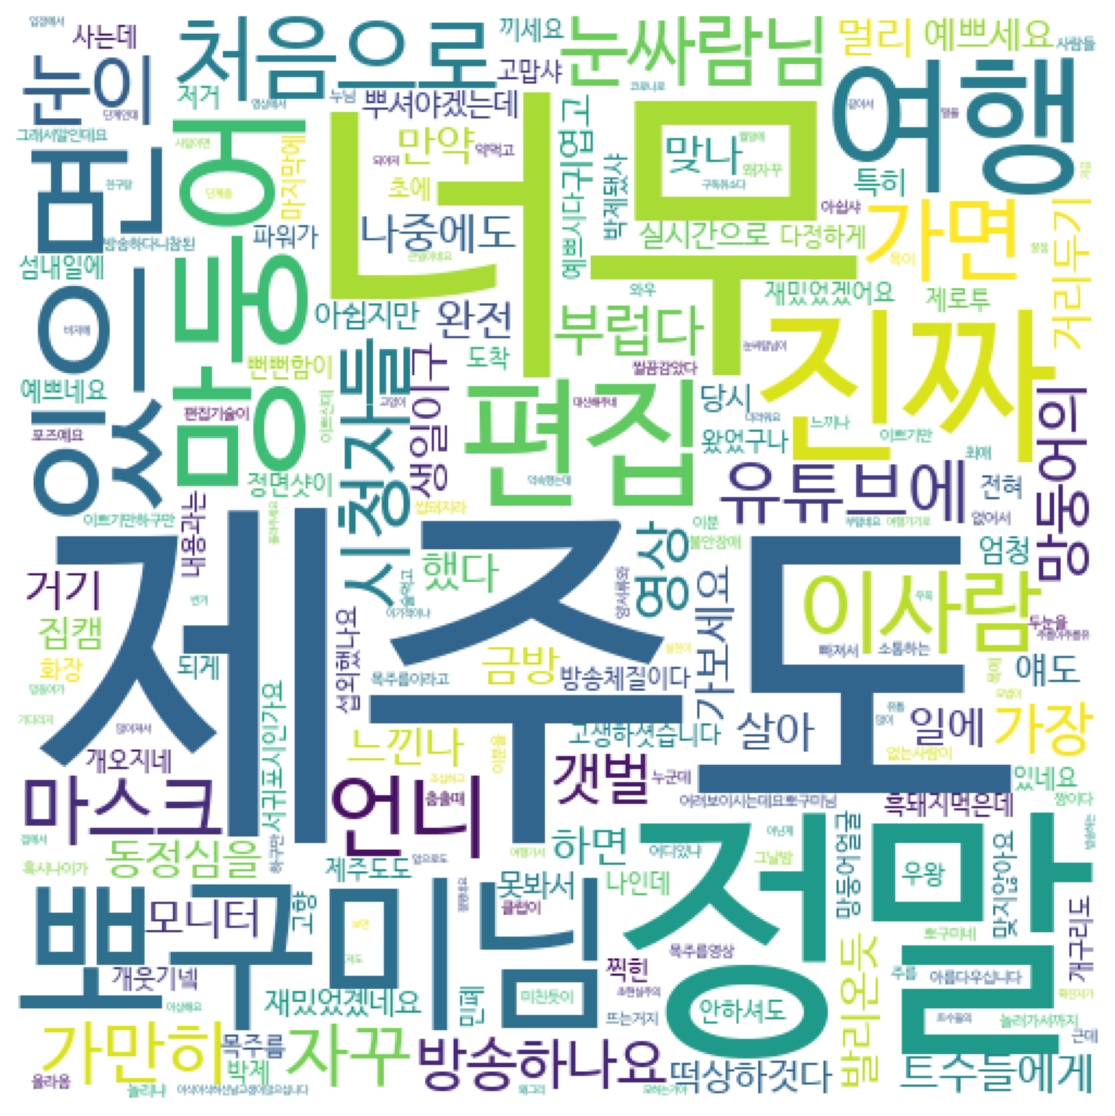

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()